In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("adult.csv")

In [76]:
data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [78]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [79]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [80]:
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [81]:
from sklearn.preprocessing import LabelEncoder
cat_cols = data.select_dtypes(include='object').columns
encoder = LabelEncoder()
for col in cat_cols:
    data[col] = encoder.fit_transform(data[col])
X_data = data.drop('income', axis=1)
y_data = data['income']


In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_data, test_size=0.2, random_state=2120)


In [84]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_predictions = linear_model.predict(X_test)


In [85]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
print("Linear Regression MSE:", mean_squared_error(y_test, linear_predictions))
print("Linear Regression R2:", r2_score(y_test, linear_predictions))

linear_class = (linear_predictions >= 0.5)
print("Linear Regression Accuracy:", accuracy_score(y_test, linear_class))


Linear Regression MSE: 0.128363363258084
Linear Regression R2: 0.293331060110942
Linear Regression Accuracy: 0.8236562707365627


In [86]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

logistic_predictions = logistic_model.predict(X_test)

In [87]:

from sklearn.metrics import confusion_matrix, classification_report
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_predictions))
print("Classification Report:\n", classification_report(y_test, logistic_predictions))

Logistic Regression Accuracy: 0.8385865958858659
Confusion Matrix:
 [[4330  260]
 [ 713  725]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      4590
           1       0.74      0.50      0.60      1438

    accuracy                           0.84      6028
   macro avg       0.80      0.72      0.75      6028
weighted avg       0.83      0.84      0.83      6028



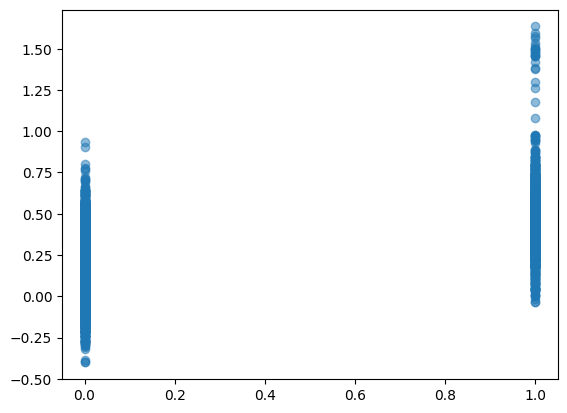

In [88]:
plt.scatter(y_test, linear_predictions, alpha=0.5)
plt.show()

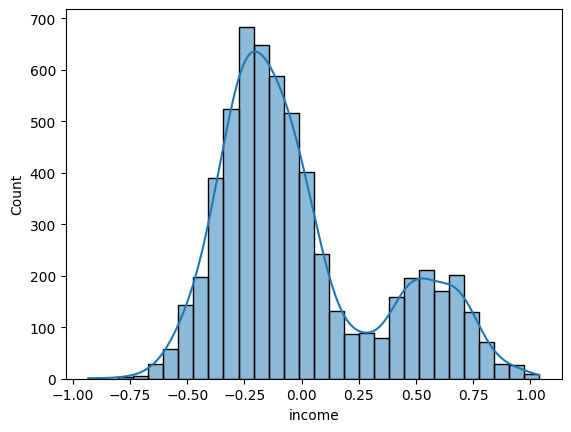

In [89]:
residuals = y_test - linear_predictions
sns.histplot(residuals, kde=True, bins=30)
plt.show()


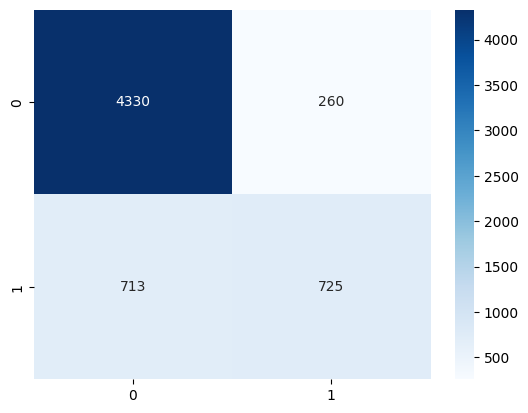

In [90]:
cm = confusion_matrix(y_test, logistic_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()